In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [67]:
data = pd.read_csv('BostonHousing.csv')

<Axes: >

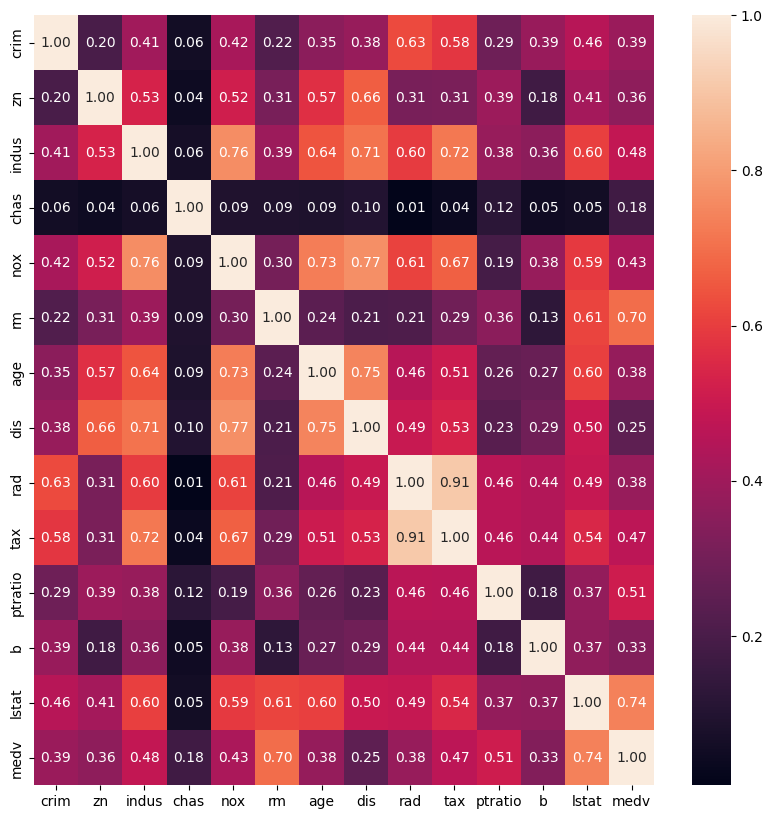

In [68]:
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr().abs(), annot=True, fmt='.2f')

In [69]:
# extracting input and output variables
X = data.drop(columns=['medv', 'age'], axis=1)
y = data['medv']

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [71]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train) # Fit (fetch mean and standard deviation) to data with no transformation
X_test = scale.transform(X_test) # formula apply standard normalization

In [72]:
clf = LinearRegression()
clf.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
ypred = clf.predict(X_test)
mse = np.mean((y_test - ypred)**2)
mse

np.float64(24.183807666549487)

In [ ]:
clf.score(X_test, y_test) # r2_score

0.6702228274016815

In [ ]:
def r2_score(y_true, y_pred):
    return 1 - (np.sum((y_true - y_pred) ** 2)) / np.sum((y_true - np.mean(y_true))**2)


In [79]:
# r2_score(y_test, ypred)
r2_score(y_train, clf.predict(X_train))

np.float64(0.7507663164689184)

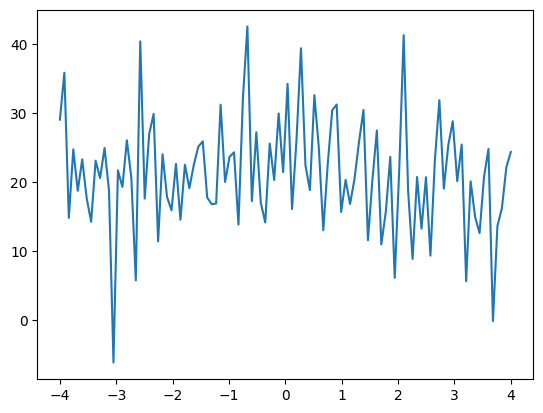

In [75]:
x = np.linspace(-4,4,102).reshape((-1,1))
# plt.scatter(X,y)
# plt.plot(x,clf.predict(x),c='r')
plt.plot(x, clf.predict(X_test))
plt.show()